In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv("Total.csv")

C:\Users\nites\AppData\Local\Temp\ipykernel_18332\4280927128.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Total.csv")


In [3]:
print(data)

              EmployeeName                                        JobTitle  \
0           NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1             GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2           ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3        CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4          PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
...                    ...                                             ...   
312877     Daniel W Plautz                          Public Service Trainee   
312878    David J Thompson                                  Deputy Sheriff   
312879  Keiko Weng Yee Lau                          Public Service Trainee   
312880          David Wong                                  Deputy Sheriff   
312881     Debora E Howard                               Recreation Leader   

          BasePay OvertimePay   OtherPay      Benefits   TotalP

In [4]:
print(data.shape)

(312882, 9)


In [5]:
data.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


## Data Cleaning & Preprocessing

In [7]:
pay_col = ['BasePay','OvertimePay','OtherPay','Benefits']

In [8]:
def to_number(s):
    if pd.isna(s):
        return np.nan
    
    s = str(s).strip()
    
    if s.lower() in {'not provided','n/a','na','-',''}:
        return np.nan
    
    s = (s.replace('$','')
         .replace(',','')
         .replace(' ','')
         .replace('(','')
         .replace(')','')        
    )
    
    try:
        return float(s)
    except:
        return np.nan 


In [9]:
for c in pay_col:
    data[c] = data[c].apply(to_number)

In [10]:
print(data[pay_col].dtypes)

BasePay        float64
OvertimePay    float64
OtherPay       float64
Benefits       float64
dtype: object


In [11]:
print(data[pay_col].isna().sum())

BasePay          606
OvertimePay        1
OtherPay           1
Benefits       36160
dtype: int64


## Handle Missing Values

In [12]:
data['BasePay'] = data['BasePay'].fillna(0.0)

data['OtherPay'] = data['OtherPay'].fillna(0.0)

data['OvertimePay'] = data['OvertimePay'].fillna(0.0)

data['Benefits'] = data['Benefits'].fillna(0.0)

In [13]:
print(data[pay_col].isna().sum())

BasePay        0
OvertimePay    0
OtherPay       0
Benefits       0
dtype: int64


## Clean Text Column

In [14]:
data['JobTitle'] = data['JobTitle'].astype(str).str.strip()

data['EmployeeName'] = data['EmployeeName'].astype(str).str.strip()

## Exploratory Data Analysis on cleaned data

### Summary & Structure

In [16]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  float64
 3   OvertimePay       312882 non-null  float64
 4   OtherPay          312882 non-null  float64
 5   Benefits          312882 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [18]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000,312882.000000
mean,69673.050600,5668.911274,3460.683913,22125.693989,78802.645788,100928.339777,2014.625303
std,45436.746729,12745.638970,7387.253906,16289.184099,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35342.125000,0.000000,0.000000,2079.272500,38803.000000,48955.072500,2013.000000
50%,67645.970000,0.000000,728.000000,26771.565000,74908.790000,100011.290000,2015.000000
75%,99236.202500,5223.115000,3958.680000,34288.847500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


### Distribution of Pay columns

In [20]:
import matplotlib.pyplot as plt

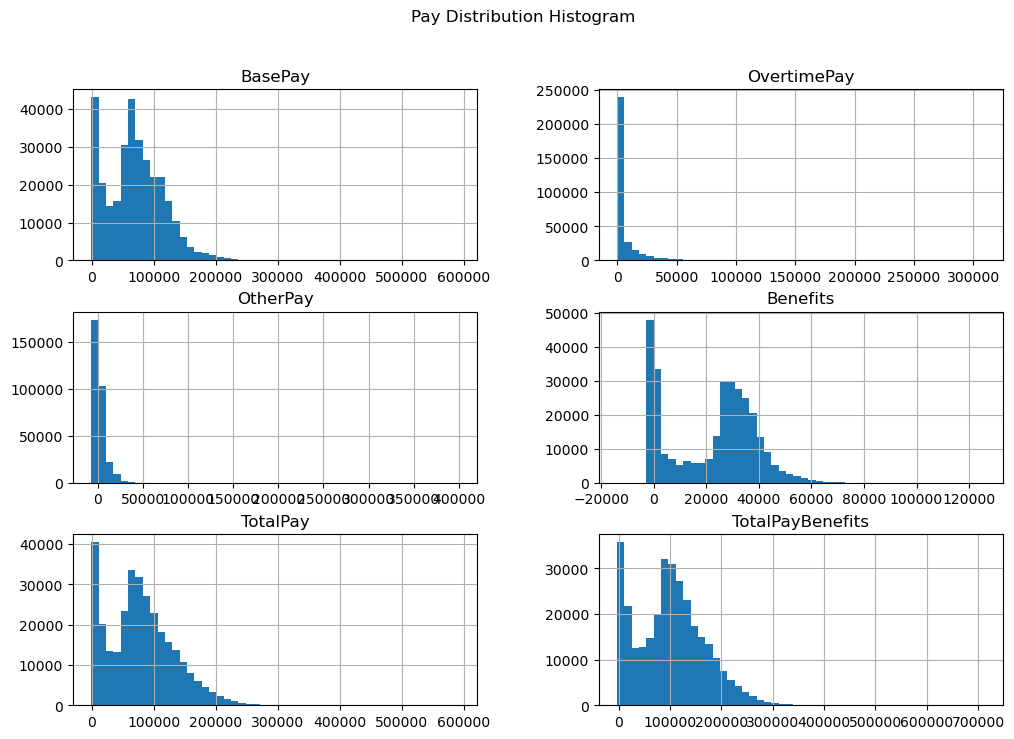

In [23]:
pay_cols = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']

data[pay_cols].hist(bins=50,figsize=(12,8))
plt.suptitle("Pay Distribution Histogram")
plt.show()